# Notebook to plot power spectra and CF

## Loading packages

In [3]:
import numpy as np
# import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt

ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]

In [4]:
# # hf.close()
# # Writing HDF5 files contaning full information
# hf = h5.File('RSD_datasets.h5', 'w')
# group=hf.create_group('gev_lcdm')
# redshifts = group.create_group('total_parameters')
# directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD"

# data = {'gevolution_boxsize_4032_ngrid_4608_lcdm_05062020':  [1,2,3,4,5,5],
#         'Second Column Name': ['gevolution_boxsize_4032_ngrid_4608_lcdm_05062020', [1,2,3,4,5,5]],
#         }

# df = pd.DataFrame (data, columns = ['gevolution_boxsize_4032_ngrid_4608_lcdm_05062020','Second Column Name'])

# print (df['gevolution_boxsize_4032_ngrid_4608_lcdm_05062020'])


## Loading power and CF data

In [5]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];
redshifts = ["0", "0.5", "1", "2", "3"];


gev_lcdm_rsd=[]
gev_lcdm_no_rsd=[]
# kev_cs2_e4=[]
# gev_cs2_e7=[]
# gev_

for i in range(5):
        gev_lcdm_rsd.append(load(directory+"/RSD/pk3D_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_"+str(redshifts[i])+".npy"))
        gev_lcdm_no_rsd.append(load(directory+"/no_RSD//pk3D_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_"+str(redshifts[i])+".npy"))


# Powerspectra comparison

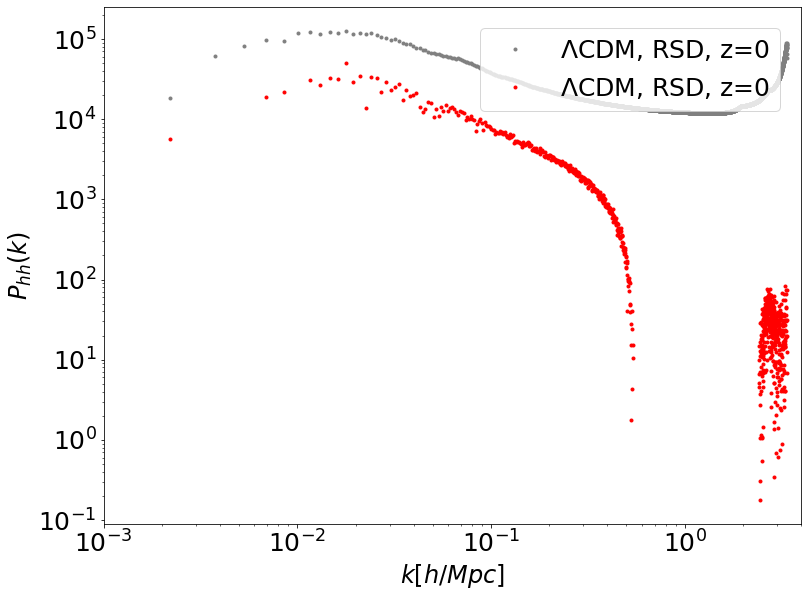

In [26]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.loglog(gev_lcdm_rsd[i][0,:],gev_lcdm_rsd[i][1,:],".",color =ColorsI[i-1], lw=3,label="$\Lambda$CDM, RSD, z="+redshifts[i])

    plt.loglog(gev_lcdm_rsd[i][0,:],gev_lcdm_rsd[i][2,:],".",color =ColorsI[i], lw=3,label="$\Lambda$CDM, RSD, z="+redshifts[i])
# plt.loglog(P1k_kess_csem7_z1[0,:],P1k_kess_csem7_z1[1,:],".",lw=3,label="$k$-essence, $c_s^2=10^{-7}$")
#     plt.loglog(gev_lcdm_no_rsd[i][0,:],gev_lcdm_no_rsd[i][2,:],".",color =ColorsI[i+2], lw=3,label="$\Lambda$CDM, no-RSD, z="+redshifts[i])


    fig.legend(fontsize=25,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$P_{hh}(k)$',fontsize=24)
    plt.xlabel('$k[h/Mpc]$',fontsize=24)
    # plt.yscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
#     plt.ylim(1.e4,3.e5)
    plt.xlim(1.e-3,4.e0)

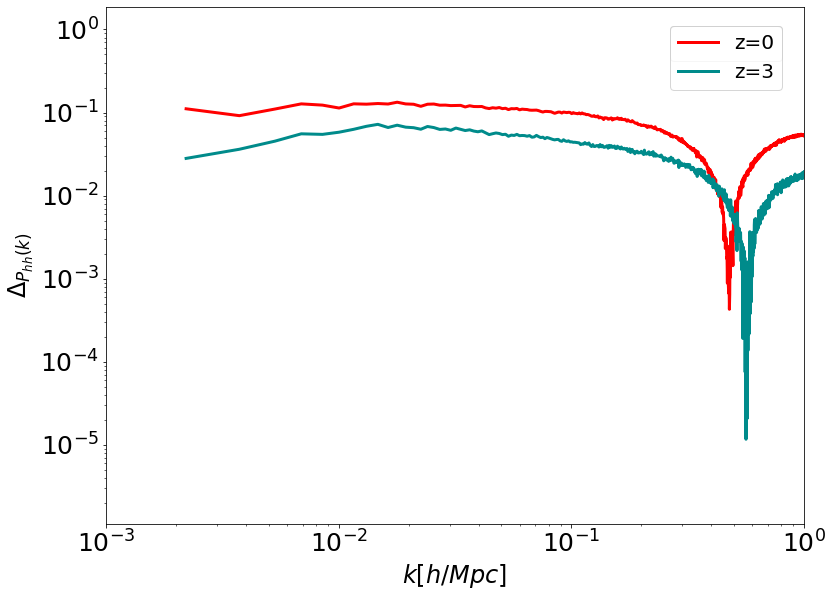

In [23]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0,4]:
    plt.loglog(gev_lcdm_rsd[i][0,:],np.abs(gev_lcdm_no_rsd[i][1,:]-gev_lcdm_rsd[i][1,:])/gev_lcdm_rsd[i][1,:],"-",color =ColorsI[i], lw=3,label="z="+redshifts[i])
#     plt.loglog(gev_lcdm[i][0,:],np.abs(kev_cs2_e4[i][1,:]-gev_cs2_e7[i][1,:])/kev_cs2_e4[i][1,:],"-",color =ColorsI[i+1], lw=3,label="$c_s^2=10^{-4}$ - $c_s^2=10^{-7}$, z="+redshifts[i])
#     plt.loglog(gev_lcdm[i][0,:],np.abs(gev_cs2_1[i][1,:]-gev_cs2_e7[i][1,:])/gev_cs2_1[i][1,:],"-",color =ColorsI[i+2], lw=3,label="$c_s^2=1$ - $c_s^2=10^{-7}$, z="+redshifts[i])

    fig.legend(fontsize=20,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$\Delta_{P_{hh}(k)}$',fontsize=24)
    plt.xlabel('$k[h/Mpc]$',fontsize=24)
    # plt.yscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
#     plt.ylim(1.e4,3.e5)
    plt.xlim(1.e-3,1.e0)

In [12]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];
redshifts = ["0", "0.5", "1", "2", "3"];


gev_lcdm_rsd_c=[]
gev_lcdm_no_rsd_c=[]
# kev_cs2_e4=[]
# gev_cs2_e7=[]
# gev_

for i in range(5):
        gev_lcdm_rsd_c.append(load(directory+"/RSD/CF_full_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_"+str(redshifts[i])+".npy"))
        gev_lcdm_no_rsd_c.append(load(directory+"/no_RSD//CF_full_gevolution_boxsize_4032_ngrid_4608_lcdm_05062020_z_"+str(redshifts[i])+".npy"))


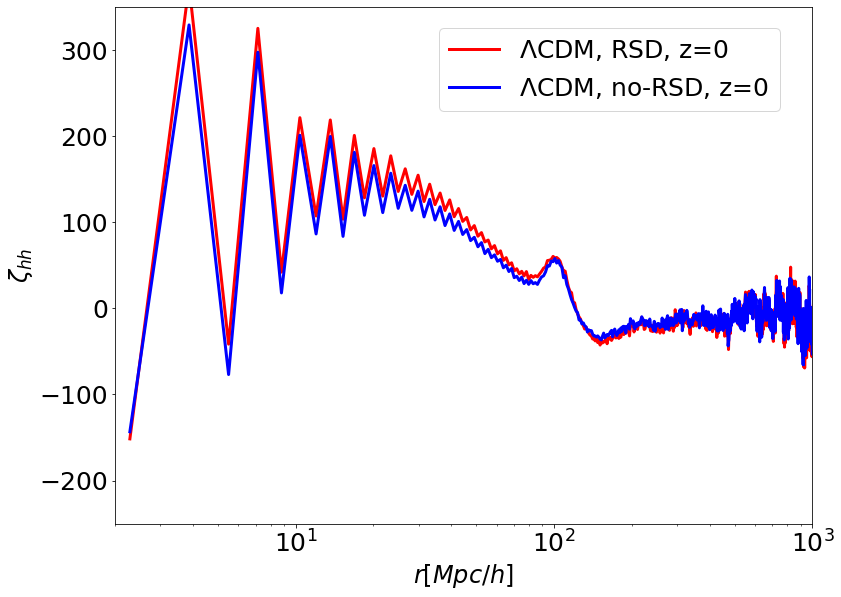

In [19]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.plot(gev_lcdm_rsd_c[i][0,:],gev_lcdm_rsd_c[i][0,:]**2 * gev_lcdm_rsd_c[i][1,:],"-",color =ColorsI[i], lw=3,label="$\Lambda$CDM, RSD, z="+redshifts[i])
    plt.plot(gev_lcdm_no_rsd_c[i][0,:],gev_lcdm_no_rsd_c[i][0,:]**2 * gev_lcdm_no_rsd_c[i][1,:],"-",color =ColorsI[i+1], lw=3,label="$\Lambda$CDM, no-RSD, z="+redshifts[i])
#     plt.plot(gev_cs2_e7_c[i][0,:],gev_cs2_e7_c[i][0,:]**2 * gev_cs2_e7_c[i][1,:],"-.",color =ColorsI[i+2], lw=3,label="$c_s^2=10^{-7}$, z="+redshifts[i])


    fig.legend(fontsize=25,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$\zeta_{hh}$',fontsize=24)
    plt.xlabel('$r[Mpc/h]$',fontsize=24)
    plt.xscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
    plt.ylim(-250,350)
    plt.xlim(2,1.e3)

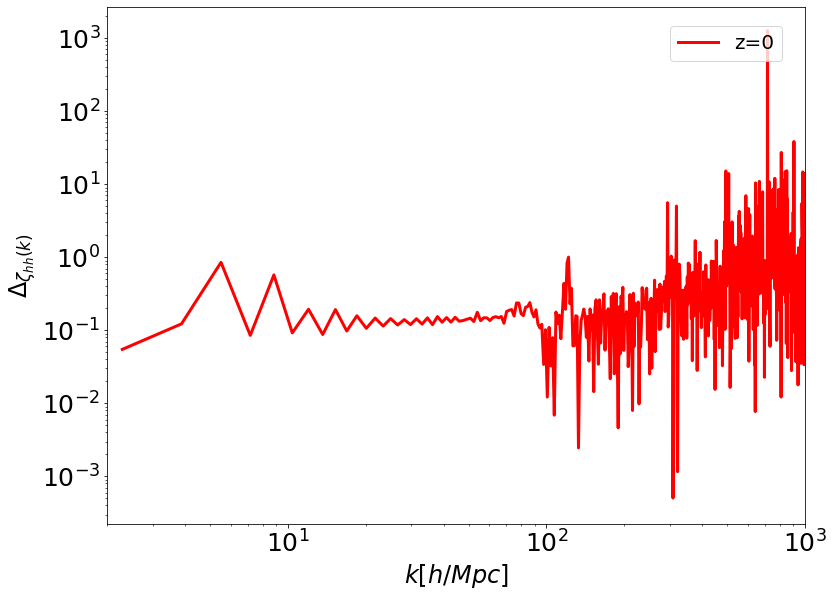

In [21]:

label_size = 22
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

for i in [0]:
    plt.loglog(gev_lcdm_rsd_c[i][0,:],np.abs(gev_lcdm_no_rsd_c[i][1,:]-gev_lcdm_rsd_c[i][1,:])/np.abs(gev_lcdm_rsd_c[i][1,:]),"-",color =ColorsI[i], lw=3,label="z="+redshifts[i])
#     plt.loglog(gev_lcdm_c[i][0,:],np.abs(kev_cs2_e4_c[i][1,:]-gev_cs2_e7_c[i][1,:])/kev_cs2_e4_c[i][1,:],"-",color =ColorsI[i+1], lw=3,label="$c_s^2=10^{-4}$ - $c_s^2=10^{-7}$, z="+redshifts[i])
#     plt.loglog(gev_lcdm_c[i][0,:],np.abs(gev_cs2_1_c[i][1,:]-gev_cs2_e7_c[i][1,:])/gev_cs2_1_c[i][1,:],"-",color =ColorsI[i+2], lw=3,label="$c_s^2=1$ - $c_s^2=10^{-7}$, z="+redshifts[i])

    fig.legend(fontsize=20,bbox_to_anchor=(0.88,0.85))
    # plt.ylim(1.e1,1.e7)
    plt.ylabel('$\Delta_{\zeta_{hh}(k)}$',fontsize=24)
    plt.xlabel('$k[h/Mpc]$',fontsize=24)
    # plt.yscale('log')
    plt.xticks(size = 25);
    plt.yticks(size = 25);
#     plt.ylim(1.e4,3.e5)
    plt.xlim(2,1000)

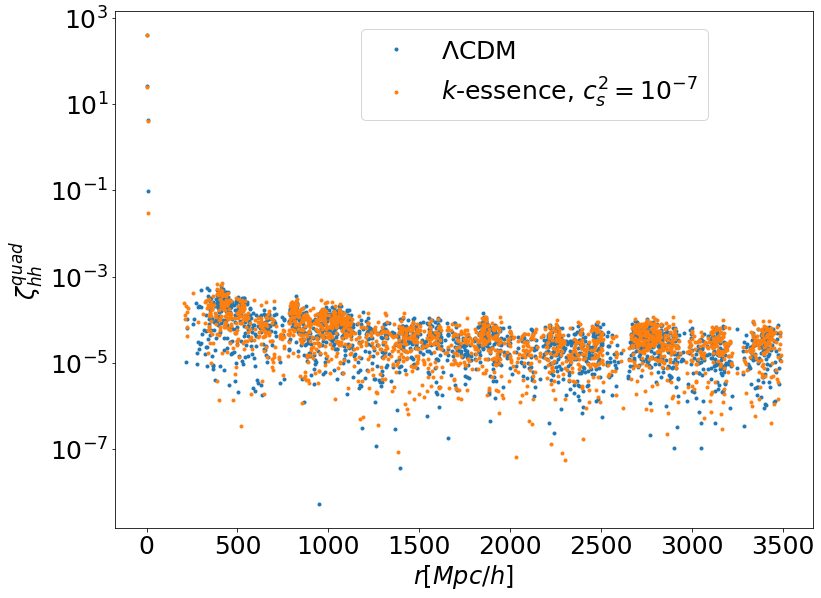

In [70]:

label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.plot(CF_lcdm_z1[0,:],CF_lcdm_z1[2,:],".",lw=3,label="$\Lambda$CDM")
plt.plot(CF_kess_csem7_z1[0,:],CF_kess_csem7_z1[2,:],".",lw=3,label="$k$-essence, $c_s^2=10^{-7}$")


fig.legend(fontsize=25,bbox_to_anchor=(0.8,0.85))
# plt.ylim(1.e1,1.e7)
plt.ylabel('$\zeta^{quad}_{hh}$',fontsize=24)
plt.xlabel('$r[Mpc/h]$',fontsize=24)
plt.yscale('log')
plt.xticks(size = 25);
plt.yticks(size = 25);
# plt.ylim(1.e-4,1.e2)
# plt.xlim(2,200)

(2, 1000)

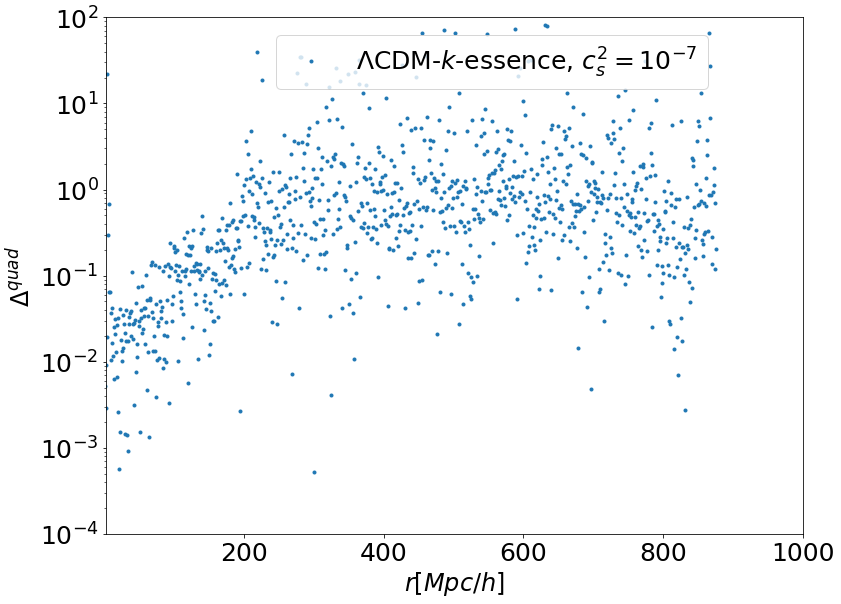

In [73]:

label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

num=1000
plt.plot(CF_lcdm_z1[0,:num],np.abs((CF_kess_csem7_z1[2,:num]-CF_lcdm_z1[2,:num])/CF_lcdm_z1[2,:num]),".",lw=3,label="$\Lambda$CDM-$k$-essence, $c_s^2=10^{-7}$")
# plt.plot(CF_kess_csem7_z1[0,:],".",lw=3,label="$k$-essence, $c_s^2=10^{-7}$")


fig.legend(fontsize=25,bbox_to_anchor=(0.8,0.85))
# plt.ylim(1.e1,1.e7)
plt.ylabel('$\Delta^{quad}$',fontsize=24)
plt.xlabel('$r[Mpc/h]$',fontsize=24)
plt.yscale('log')
plt.xticks(size = 25);
plt.yticks(size = 25);
plt.ylim(1.e-4,1.e2)
plt.xlim(2,1000)

### Computing the density fields

In [3]:
# input parameters
grid    = 300  
BoxSize = 4032 #Mpc/h
MAS     = 'CIC'

# define the array hosting the density field
delta = np.zeros((grid,grid,grid), dtype=np.float32)

In [4]:
# read the particle positions
Num =np.shape(Halos_lcdm_z3[:,8])[0];
posx = Halos_lcdm_z3[:Num,8]; posy=Halos_lcdm_z3[:Num,9];posz=Halos_lcdm_z3[:Num,10]; #Mpc/h 
pos = np.zeros((np.shape(posx)[0],3))
pos[:,0]=posx;
pos[:,1]=posy;
pos[:,2]=posz;
pos = pos.astype(np.float32)   #pos should be a numpy float array

## Density field

In [5]:
# compute density field
# do_RSD   = False
# axis     = 0 
MASL.MA(pos,delta,BoxSize,MAS)

In [6]:
%%time
mean_delta=np.mean(delta, dtype=np.float64);

CPU times: user 21.9 ms, sys: 1.29 ms, total: 23.2 ms
Wall time: 24.3 ms


In [7]:
%%time
# compute overdensity field
delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0 

CPU times: user 74.7 ms, sys: 3.96 ms, total: 78.7 ms
Wall time: 104 ms


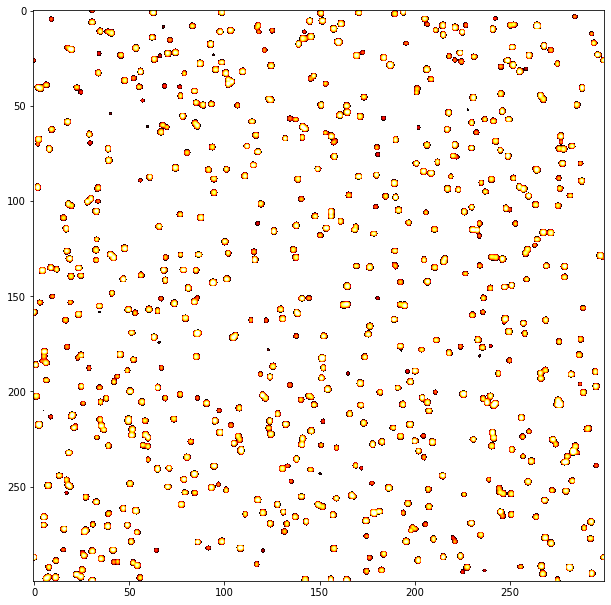

In [13]:
# fig = figure()    #create the figure
# plt.figure(figsize=(1,1))
import matplotlib.pyplot as plt

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111) 
scale           = 'log' #'linear' or 'log'
min_overdensity = 0.5      #minimum overdensity to plot
max_overdensity = 50.0    #maximum overdensity to plot

# imshow(delta[:,:,0],cmap=get_cmap('hot'),interpolation='bicubic',norm = LogNorm(vmin=min_overdensity,vmax=max_overdensity))

image = imshow(delta[:,:,2],cmap=get_cmap('hot'),interpolation='bicubic',norm = LogNorm(vmin=min_overdensity,vmax=max_overdensity))

plt.savefig('test.png')


## Power spectrum

In [9]:
import Pk_library as PKL

In [10]:

threads = 4;
verbose = True
MAS="CIC"
axis=0
Pk = PKL.Pk(delta, BoxSize, axis,MAS, threads, verbose)


Computing power spectrum of the field...
Time to complete loop = 1.46
Time taken = 1.61 seconds


In [11]:
# 1D P(k)
k1D      = Pk.k1D      
Pk1D     = Pk.Pk1D     
Nmodes1D = Pk.Nmodes1D  

In [12]:
# k = np.arange(0.001,1,0.001)
# ks=0.05;
# ns=0.95;
# As = 1.9*1.e3
# power = As * (k/ks)**(ns-1);

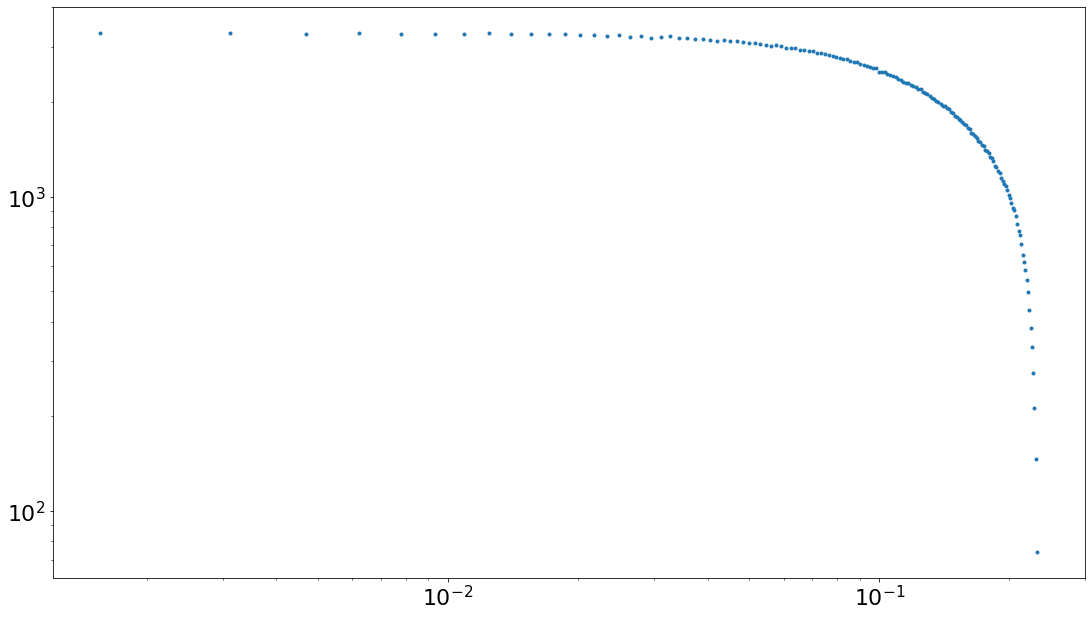

In [13]:
# plt.figure(figsize=(20,10))
import matplotlib as mpl
label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)



loglog(k1D,Pk1D,".",lw=3)
# loglog(k,power,".",lw=3)
# matplotlib.xticks(fontsize=14, rotation=90)


## 3D power

In [14]:
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole
Pk4     = Pk.Pk[:,2] #hexadecapole
Pkphase = Pk.Pkphase #power spectrum of the phases
Nmodes  = Pk.Nmodes3D


(10.0, 10000000.0)

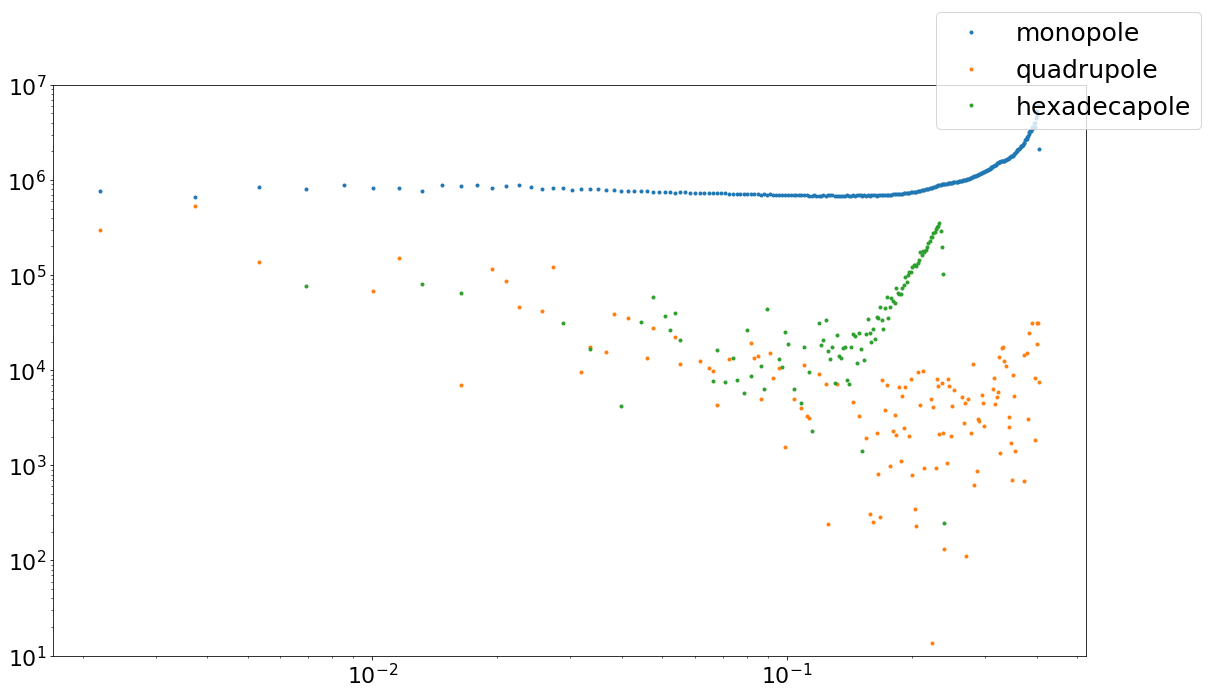

In [15]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

plt.loglog(k,Pk0,".",lw=3,label="monopole")
plt.loglog(k,Pk2,".",lw=3,label="quadrupole")
plt.loglog(k,Pk4,".",lw=3,label="hexadecapole")

fig.legend(fontsize=25)
plt.ylim(1.e1,1.e7)

# Correlation function

In [16]:
import numpy as np
import Pk_library as PKL

# CF parameters
BoxSize = 4032.0 #Mpc/h
MAS     = 'CIC'
threads = 16
axis    = 0

# compute the correlation function
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)
r      = CF.r3D #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes


Computing correlation function of the field...
Time to complete loop = 0.17
Time taken = 1.15 seconds


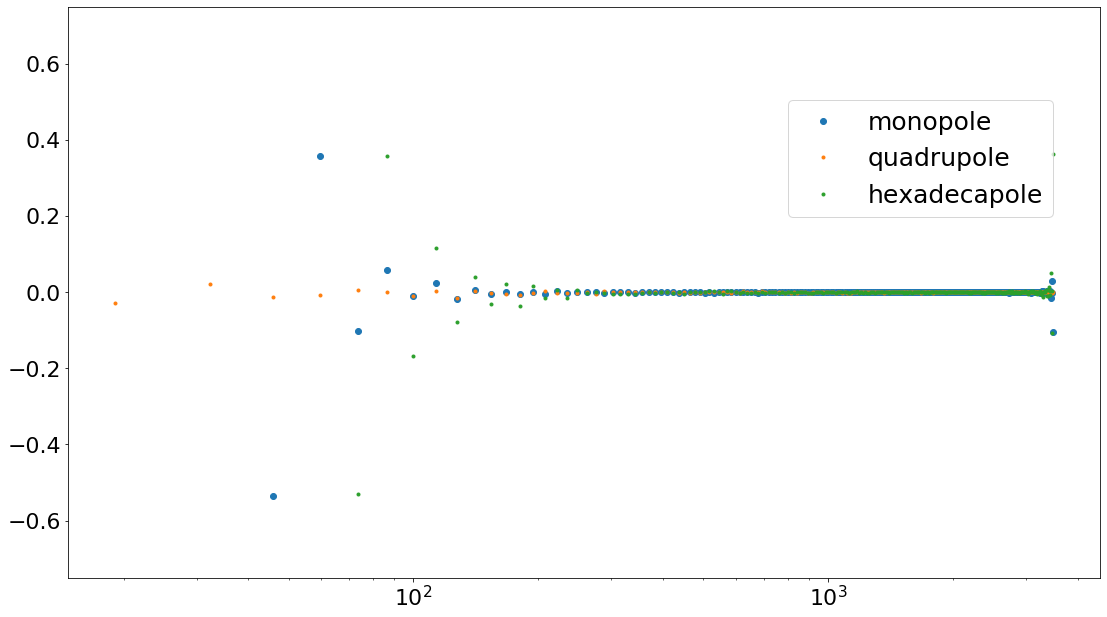

In [17]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

plt.plot(r,xi0,"o",lw=3,label="monopole")
plt.plot(r,xi2,".",lw=3,label="quadrupole")
plt.plot(r,xi4,".",lw=3,label="hexadecapole")

fig.legend(fontsize=25,bbox_to_anchor=(0.8,0.7))
plt.ylim(-0.75,0.75)
plt.xscale('log')

# Void finder

In [ ]:
# import numpy as np
import void_library as VL

# parameters of the void finder
BoxSize    = 4032.0 #Mpc/h
threshold  = -0.1
Radii      = np.array([140], dtype=np.float32) #Mpc/h
threads1   = 2
threads2   = 2
void_field = True

# identify voids
V = VL.void_finder(delta, BoxSize, threshold, Radii, threads1, threads2, void_field=void_field)
void_pos    = V.void_pos    #positions of the void centers
void_radius = V.void_radius #radius of the voids
VSF_R       = V.Rbins       #bins in radius for VSF(void size function)
VSF         = V.void_vsf    #VSF (#voids/volume/dR)
# if void_field:  void_field  = V.void_field

In [ ]:
plt.plot(void_pos)

## Non-linear matter power

In [105]:
# import numpy as np
# import cosmology_library as CL

# z       = 1.0
# Omega_m = 0.3175
# Omega_l = 0.6825

# # k_lin, Pk_lin = np.loadtxt('my_Pk_file_z=0.txt', unpack=True)
# # Pk_nl = CL.Halofit_12(Omega_m, Omega_l, z, k_lin, Pk_lin)